Use a three layer neural network to classify the two sets of 3-D data set. You should generate 50 samples for each data set based on the following criteria:

Data set 1: Generate randomly a set of data set in three dimensions x1 x2, and x3. The data set has -0.5 <= x1 <= 0.5 ,  -0.5 <= x2 <= 0.5 , and x3=1

Data set 2: Generate randomly a set of data where x1 and x2  are  between two circles with radius of  3 and 4 having the center as the coordinate, and x3=1

Plot your initial and final data sets. Plot error function as well. You should try your experience with different number of nodes in the first and second layer and then choose the network with the minimum number of nodes!
Do not transfer your dataset to a new dimension!

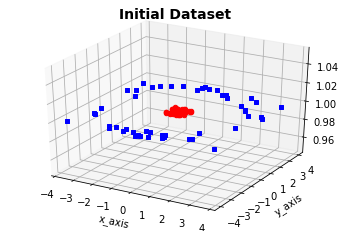

In [9]:
#Initial Data set Ploting:

#importing modules
import numpy as pyn
from matplotlib import pyplot as pyplt
from mpl_toolkits.mplot3d import Axes3D
import random
import math
from IPython import display
import time

#dataset one declaration
x1_list = []
x2_list = []
x3_list = []

#dataset two declaration
x11_list = []
x22_list = []
x33_list = []


#values for first data set
for i in range(50):
    x1 = random.uniform(-0.5,0.5)
    x2 = random.uniform(-0.5,0.5)
    x1_list.append(x1)
    x2_list.append(x2)

    
#values for second dataset first part
    
for i in range(25):    
    r = random.uniform(9,16)
    x_1 = random.uniform(-4,4)
    radius = r-pow(x_1,2)
    if(radius>0):
        x_2=math.sqrt(radius)
        
        
    x11_list.append(x_1)
    x22_list.append(x_2)
    

#values for second dataset second part
    
for i in range(25):   
    r = random.uniform(9,16)
    x_1 = random.uniform(-4,4)
    radius = r-pow(x_1,2)
    if(radius>0):
        x_2_temp = math.sqrt(radius)
        #inorder to take x_2 in negative values 
        x_2 = -(x_2_temp)
    x11_list.append(x_1)
    x22_list.append(x_2)

#Taking x3 values as 1 
for i in range(50):
    x3_list.append(1)

for i in range(50):
    x33_list.append(1)
    
#Ploting the initial dataset
fig = pyplt.figure()
ax = fig.add_subplot(111, projection='3d')
pyplt.title("Initial Dataset",size=14,fontweight="bold")
plt.xlabel("x_axis")
plt.ylabel("y_axis")

for i in range(50):
        ax.scatter(x1_list[i],x2_list[i],x3_list[i], marker="o", c="r")
        ax.scatter(x11_list[i],x22_list[i],x33_list[i], marker="s", c="b")

pyplt.show()

please enter number of first layer (m) nodes: 10
please enter number of second layer (n) nodes: 9


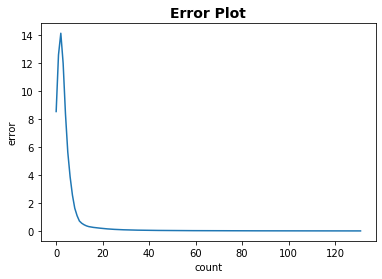

In [5]:
#importing modules
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random
import math
from IPython import display
import time

#Learning rate
lr = 0.85


#input dataset declaration
x1_list = []
x2_list = []
x3_list = []
x11_list = []
x22_list = []
x33_list = []
t_list = []
Error_list = []

#Taking user input for number of nodes in different layers
m=int(input("please enter number of first layer (m) nodes: "))
n=int(input("please enter number of second layer (n) nodes: "))

#Generating first data set
for i in range(50):
    x1 = random.uniform(-0.5,0.5)
    x2 = random.uniform(-0.5,0.5)
    x1_list.append(x1)
    x2_list.append(x2)
    x3_list.append(1)
    #taking target as 0
    t_list.append(0)

#Generating second data set
for i in range(25):    
    r = random.uniform(9,16)
    x_1 = random.uniform(-4,4)
    temp = r-pow(x_1,2)
    if(temp > 0):
        x_2 = math.sqrt(temp)
    x11_list.append(x_1)
    x22_list.append(x_2)
    t_list.append(1)
    x33_list.append(1)
    
for i in range(25):   
    r = random.uniform(9,16)
    x_1 = random.uniform(-4,4)
    temp = r-pow(x_1,2)
    if(temp > 0):
        x_2_temp = math.sqrt(temp)
        #taking negative input values
        x_2 = -(x_2_temp)
    x11_list.append(x_1)
    x22_list.append(x_2)
    t_list.append(1)
    x33_list.append(1)

#Appending input datasets
x_temp = [x1_list + x11_list , x2_list + x22_list , x3_list + x33_list] 
# print(np.shape(x_temp))

#Transposing matrix to 100*3
x = np.array(x_temp).T

#print("input shape",np.shape(x)) 

#Initial weights declaration
w_in = np.random.uniform(-2,2,[3,m])
w_hd = np.random.uniform(-2,2,[m,n])
w_out = np.random.uniform(-2,2,[n])

#bias weights declaration
b_in_w = np.random.uniform(-2,2,m)
b_Hd_W = np.random.uniform(-2,2,n)
b_out_w = np.random.uniform(-2,2,1)
    
#Sigmiod functions
def sigmoid(x):
    return 1 / ( 1 + np.exp(-x) )

#derivated sigmoid function
def sigmoid_p(x):
    return x*(1 - x)

#looping until total error is less than 0.01
while True:
    #Total Weight declaration
    total_Error = 0
    for i in range(len(t_list)):
#Input layer activation
        in_l = np.dot(x[i] , w_in) + b_in_w
        in_act = sigmoid(in_l)
        #to be 1*3 
#         print("in_act",np.shape(in_act))

#Hidden layer activation
        hd_l = np.dot(in_act , w_hd) + b_Hd_W
        hd_act = sigmoid(hd_l)
#         print("hd_act",np.shape(hd_act))

#output layer activation
        out_l = np.dot(hd_act , w_out) + b_out_w
        out_act = sigmoid(out_l)
        #print("out_act",np.shape(out_act))

        #Error Calculation
        Error = (t_list[i] - out_act)**2
        der_Error = (t_list[i] - out_act)
#         print("E",np.shape(Error))
#         print("d_E",np.shape(der_Error))

#***********backward propagation *********
        #output layer
        #Change in weight output layer
        d_b_out = lr * der_Error * sigmoid_p(out_act)
        d_w_out = np.multiply(d_b_out, hd_act)
        w_out = w_out + d_w_out
        b_out_w = b_out_w + d_b_out
#         print("delta_weight_output",np.shape(d_w_out))
#         print("delta bias out",np.shape(d_b_out))
#         print("changed weight output",np.shape(w_out))
#         print("changed bias weight output",np.shape(b_out_w))

#adding up output layer to a scalar value
        sum_out = np.sum(der_Error * sigmoid_p(out_act) * w_out)
#         print("sum_out",sum_out)


        #HiddenLayer
        #change in weight hidden layer
        d_hd_temp = np.array([lr * sum_out * sigmoid_p(hd_act)])
        d_hd_w = np.dot(np.array([in_act]).T, d_hd_temp)
#         print("delta_weight_hidden",np.shape(d_hd_w))
#         print("delta_weight_hidden SHAPE changed",np.shape(d_hd_w))
        d_b_hd = lr * sum_out * sigmoid_p(hd_act)
#         print("delta bias weight hidden",np.shape(d_b_hd))    


        w_hd = w_hd + d_hd_w
        b_Hd_W = b_Hd_W + d_b_hd
#         print("change weight hidden",np.shape(w_hd))
#         print("change bias weight hidden",np.shape(b_Hd_W))
#adding up output layer to hidden layer to a scalar value
        sum_in = np.sum(sum_out * sigmoid_p(hd_act) * w_hd)
#         print("sum in",sum_in)

        #InputLayer
    # change in weights in input layer
        d_in_temp = np.array([lr * sum_in * sigmoid_p(in_act)])
        d_w_in = np.dot(d_in_temp.T, np.array([x[i]]))
        d_b_in = lr * sum_in * sigmoid_p(in_act)
        
        w_in = w_in + d_w_in.T
        b_in_w = b_in_w + d_b_in
#         print("changed weight input",np.shape(w_in))
#         print("changed bias weight input",np.shape(b_in_w))

#Adding the total error to actual error
        total_Error = total_Error + Error
    Error_list.append(total_Error)
#     print("TOTAL ERROR VALUE",total_Error)
#         print("TOTAL ERROR",np.shape(total_Error))
#     print(Error_list)

    if total_Error < 0.01:
        break

#plotting error graph
plt.figure(2)
plt.title("Error Plot",size=14,fontweight="bold")
plt.plot(Error_list)
plt.xlabel("count")
plt.ylabel("error")
plt.show()


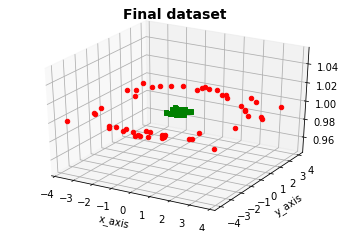

In [10]:
#importing modules
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random
import math
from IPython import display
import time

#final data set
fig = pyplt.figure()
ax = fig.add_subplot(1,1,1, projection='3d')
plt.title("Final dataset",size=14,fontweight="bold")
plt.xlabel("x_axis")
plt.ylabel("y_axis")


for i in range(100):
    in_l = np.dot(x[i] , w_in) + b_in_w
    in_act = sigmoid(in_l)
    hd_l = np.dot(in_act , w_hd) + b_Hd_W
    hd_act = sigmoid(hd_l)
    out_l = np.dot(hd_act , w_out) + b_out_w
    out_act = sigmoid(out_l)
    
    xone=[]
    xtwo=[]
    xthree=[]
    xone=x1_list+x11_list
    xtwo=x2_list+x22_list
    xthree=x3_list+x33_list
#     print(xone,xtwo,xthree)

#plotting final dataset based on output activation
    if(out_act>0.9):
        ax.scatter(xone[i],xtwo[i],xthree[i], marker="o", c="red")
    else:
        ax.scatter(xone[i],xtwo[i],xthree[i], marker="s", c="green")
        
pyplt.show()